In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

# Data Collection & Processing

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
# Nornalize Data (0 - 1)

x_train = x_train / 255
x_test = x_test / 255

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

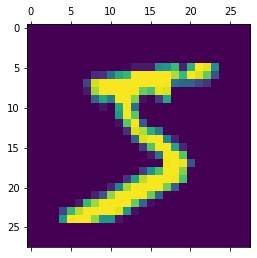

In [8]:
plt.matshow(x_train[0])

In [9]:
y_train[0]

5

In [10]:
# Converting Data From 2D to 1D Array

x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)


# Building Model

In [16]:

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784, ), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

model.fit(x_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2754 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1285 - accuracy: 0.9621
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0886 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0656 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9837


In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0793 - accuracy: 0.9756


[0.07925368845462799, 0.975600004196167]

In [ ]:
# Predicting/Testing Model

y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 1s 1ms/step


In [ ]:
y_predicted[0]

array([2.6467850e-02, 8.4901432e-05, 3.1865865e-01, 9.8600328e-01,
       4.6337344e-05, 2.6818871e-01, 1.1290764e-07, 9.9998784e-01,
       9.4298013e-02, 1.5440695e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

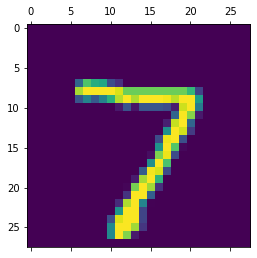

In [ ]:
plt.matshow(x_test[0])

In [ ]:
# Storing All Prediction in a list

y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]